In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # used to split data set into (x, y) train and (x, y) test 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler # used to transform data in to stadarization form
from sklearn.linear_model import LogisticRegression, LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv(r'Social_Network_Ads.csv')
df.describe()
#this data set consederd classification problem 

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [225]:
def mapper (gender):
    if gender == 'Male':
        return 1
    else :
        return 2
df['Gender'] =  df['Gender'].apply(mapper)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,2,46,41000,1
396,15706071,1,51,23000,1
397,15654296,2,50,20000,1
398,15755018,1,36,33000,0


In [226]:
features = df[['Age', 'EstimatedSalary', 'Gender']]
test = df['Purchased']
x_train,x_test, y_train, y_test = train_test_split(features, test, test_size=.3,random_state=0)

In [227]:
x_train.describe()

,Age,EstimatedSalary,Gender
count,280.000000,280.000000,280.000000
mean,37.864286,69807.142857,1.496429
std,10.218201,34641.201654,0.500882
min,18.000000,15000.000000,1.000000
25%,30.000000,43000.000000,1.000000
50%,37.000000,70500.000000,1.000000
75%,46.000000,88000.000000,2.000000
max,60.000000,150000.000000,2.000000


# MinMaxScaler
Transform features by scaling each feature to a given range, 

The transformation is given by:

    X_scaled = X_std * (max - min) + min

MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range

In [228]:
scaler1, scaler2 = MinMaxScaler(feature_range=(1, 3.95)), MinMaxScaler(feature_range=(1, 3.95))

scaler1.fit(x_train)
scaler2.fit(x_test)

x_train_scaled = scaler1.transform(X=x_train)
x_test_scaled = scaler2.transform(X=x_test)
x_train_scaled = pd.DataFrame(data=x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(data=x_test_scaled, columns=x_test.columns)


In [229]:
x_train_scaled.describe()

,Age,EstimatedSalary,Gender
count,280.000000,280.000000,280.000000
mean,2.395230,2.197638,2.464464
std,0.717707,0.756974,1.477603
min,1.000000,1.000000,1.000000
25%,1.842857,1.611852,1.000000
50%,2.334524,2.212778,1.000000
75%,2.966667,2.595185,3.950000
max,3.950000,3.950000,3.950000


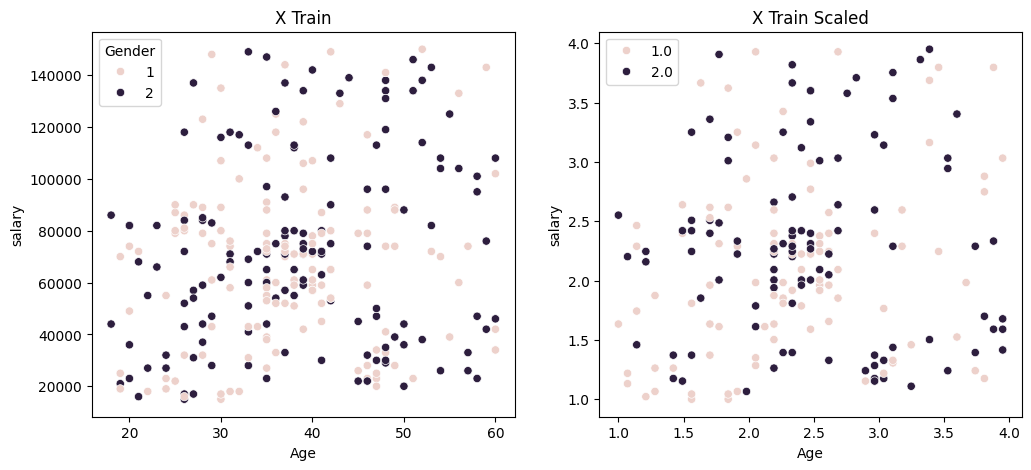

In [230]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

sns.scatterplot(
    x=x_train['Age'],
    y=x_train['EstimatedSalary'],
    hue=x_train['Gender'],
    color='red',
    ax=axs[0]
)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('salary')
axs[0].set_title('X Train')

sns.scatterplot(
    x=x_train_scaled['Age'],
    y=x_train_scaled['EstimatedSalary'],
    hue=x_train['Gender'],
    color='blue',
    ax=axs[1]
)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('salary')
axs[1].set_title('X Train Scaled')
plt.legend()
plt.show()

# modeling

In [231]:
def modeling(name_scaler):
    logistic, logistic_scaled = LogisticRegression(), LogisticRegression()
    logistic.fit(X=x_train, y=y_train)
    logistic_scaled.fit(X=x_train_scaled, y=y_train)
    predict = logistic.predict(X=x_test)
    predict_scaled = logistic_scaled.predict(X=x_test_scaled)
    
#    if name_scaler != 'RobustScaler':
#        print('scaler is ', name_scaler)
#        print('accuracy_score of not scaled data set ',accuracy_score(y_test, predict) * 100 , '%')
#        print('accuracy_score of scaled data set',     accuracy_score(y_test, predict_scaled) * 100 , '%')
    score1 = accuracy_score(y_test, predict) * 100
    score2 = accuracy_score(y_test, predict_scaled) * 100

    return score1, score2

In [232]:
modeling('MinMaxScaler')

(89.16666666666667, 90.0)

# MaxAbsScaler
Scale each feature by its maximum absolute value

    x_i / max(x)

doesn’t reduce the effect of outliers; it only linearly scales them down

In [233]:
scaler1, scaler2 = MaxAbsScaler(), MaxAbsScaler()

scaler1.fit(x_train)
scaler2.fit(x_test)

x_train_scaled = scaler1.transform(X=x_train)
x_test_scaled = scaler2.transform(X=x_test)
x_train_scaled = pd.DataFrame(data=x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(data=x_test_scaled, columns=x_test.columns)


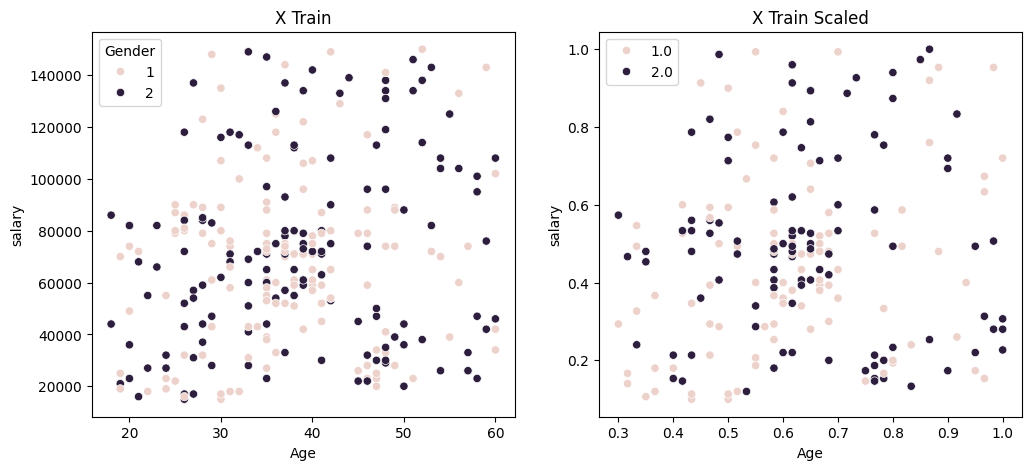

In [234]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

sns.scatterplot(
    x=x_train['Age'],
    y=x_train['EstimatedSalary'],
    hue=x_train['Gender'],
    color='red',
    ax=axs[0]
)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('salary')
axs[0].set_title('X Train')

sns.scatterplot(
    x=x_train_scaled['Age'],
    y=x_train_scaled['EstimatedSalary'],
    hue=x_train['Gender'],
    color='blue',
    ax=axs[1]
)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('salary')
axs[1].set_title('X Train Scaled')
plt.legend()
plt.show()

In [235]:
modeling('MaxAbsScaler')

(89.16666666666667, 84.16666666666667)

# RobustScaler
This scaler is a good one with outliers, because This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range)

    (x_i - median(x)) / IQR

This scaler make a centering by removing the median, so if you don't need a centering so assign with_centering by False

In [254]:
max_RobustScaler_score, model_score, q1, q2 = 0, 0, -1, -1
 
for Q1 in range(1, 100, 5):
    for Q2 in range(1, 100, 10):
        if Q1 > Q2: continue
        scaler1, scaler2 = RobustScaler(quantile_range=(Q1, Q2)), RobustScaler(quantile_range=(Q1, Q2))
        scaler1.fit(x_train)
        scaler2.fit(x_test)
        x_train_scaled = scaler1.transform(X=x_train)
        x_test_scaled = scaler2.transform(X=x_test)
        x_train_scaled = pd.DataFrame(data=x_train_scaled, columns=x_train.columns)
        x_test_scaled = pd.DataFrame(data=x_test_scaled, columns=x_test.columns)

        score1, score2 = modeling('RobustScaler')

        if score2 > max_RobustScaler_score:
            print('Rodust with centring')
            print('accuracy_score of not scaled data set ',score1 , '%')
            print('accuracy_score of scaled data set',     score2 , '%')
            max_RobustScaler_score, model_score, q1, q2 = score2, score1, Q1, Q2

        scaler1, scaler2 = RobustScaler(quantile_range=(Q1, Q2), with_centering=False), RobustScaler(quantile_range=(Q1, Q2), with_centering=False)
        scaler1.fit(x_train)
        scaler2.fit(x_test)
        x_train_scaled = scaler1.transform(X=x_train)
        x_test_scaled = scaler2.transform(X=x_test)
        x_train_scaled = pd.DataFrame(data=x_train_scaled, columns=x_train.columns)
        x_test_scaled = pd.DataFrame(data=x_test_scaled, columns=x_test.columns)

        score1, score2 = modeling('RobustScaler')

        if score2 > max_RobustScaler_score:
            print('Rodust without centring')
            print('accuracy_score of not scaled data set ',score1 , '%')
            print('accuracy_score of scaled data set',     score2 , '%')
            max_RobustScaler_score, model_score, q1, q2 = score2, score1, Q1, Q2
print()
print('accuracy_score of not scaled data set ',model_score , '%')
print('accuracy_score of scaled data set',     max_RobustScaler_score , '%')
print('quantile_range[', q1,', ', q2,']')

Rodust with centring
accuracy_score of not scaled data set  89.16666666666667 %
accuracy_score of scaled data set 89.16666666666667 %
Rodust with centring
accuracy_score of not scaled data set  89.16666666666667 %
accuracy_score of scaled data set 90.83333333333333 %

accuracy_score of not scaled data set  89.16666666666667 %
accuracy_score of scaled data set 90.83333333333333 %
quantile_range[ 36 ,  71 ]
